# **Quantitative Risk Management**

### <font color='MediumVioletRed' style="font-size:20px"><b>Installing and importing Libraries:</b></font>

In [ ]:
# Installing additional libraries
!pip install yfinance
!pip install yahoofinancials

In [3]:
# Standard library
from typing import List

# Third-party libraries
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
from scipy.stats import norm
import scipy
import yfinance as yf
from yahoofinancials import YahooFinancials
from tabulate import tabulate

### <font color='MediumVioletRed' style="font-size:20px"><b>Question 1:</b>

Replicate the variance-covariance method with three stocks from S&P 500, take two examples from similar and different industries. Introduce weights in the portfolio. Remember, now you need to calculate the covariance between them. Change the weights arbitrarily and compare results.



Let's construct two equally-weighted portfolios:
1. Tech portfolio
  - Apple
  - Adobe Inc.
  - Advanced Micro Devices, Inc.
2. Industry diversified portfolio
  - Danaher Corporation
  - General Electric Company
  - Johnson & Johnson

In [4]:
# Portfolio1: Apple, Microsoft, Amazon
stocks1 = ["AAPL", "ADBE", "AMD"]

# Portfolio2: American Airlines, 3M, Walmart
stocks2 = ["DHR", "GE", "JNJ"]

# Weights for equally weighted portfolio
weights = [1/3]*3

In [5]:
def get_portfolio_data(stocks:List[str], start:str, end:str) -> pd.DataFrame:
  """Gets portfolio asset daily returns for a give period"""
  stock_data = yf.download(stocks, start, end, progress=False)
  stock_data = stock_data['Close']
  returns = stock_data.pct_change()
  return returns

In [6]:
# Time horizon
start = '2021-01-01'
end = '2023-09-01'

# Portfolio 1: asset returns
stock_returns_1 = get_portfolio_data(stocks1, start, end)

# Portfolio 2: asset returns
stock_returns_2 = get_portfolio_data(stocks2, start, end)

Getting data and calculating daily returns for each of the assets in two portfolios.

**Returns for assets in portfolio 1:**

In [7]:
stock_returns_1.tail()

,AAPL,ADBE,AMD
Date,,,
2023-08-25,0.012643,0.024647,0.004420
2023-08-28,0.008846,0.009256,0.003521
2023-08-29,0.021810,0.020097,0.032258
2023-08-30,0.019172,0.008861,0.006326
2023-08-31,0.001172,0.025635,-0.008162


In [8]:
stock_returns_1.describe()

,AAPL,ADBE,AMD
count,669.000000,669.000000,669.000000
mean,0.000721,0.000486,0.000738
std,0.018139,0.023266,0.032752
min,-0.058680,-0.167932,-0.138688
25%,-0.009287,-0.011203,-0.019374
50%,0.000749,0.000840,-0.000569
75%,0.012133,0.014097,0.020619
max,0.088975,0.103992,0.142690


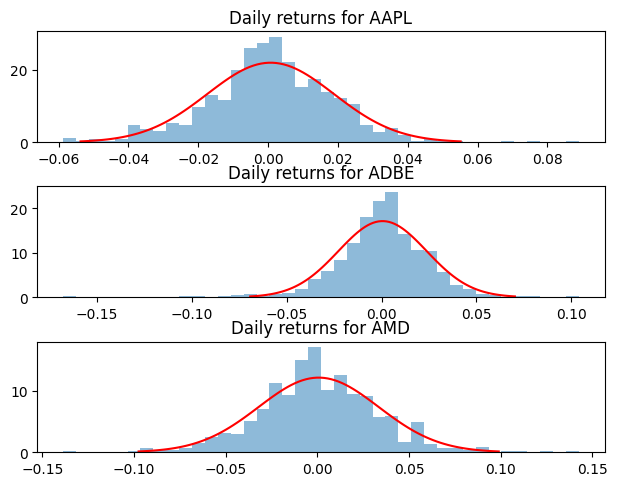

In [9]:
# Histogram of returns (overview of return distribution)

fig, axes = plt.subplots(nrows=3, ncols=1)
fig.tight_layout()

for i, ticker in enumerate(stocks1):
  # New subplot for each stock
  plt.subplot(3, 1, i + 1)
  plt.title(f"Daily returns for {ticker}")

  # Histogram of returns
  plt.hist(stock_returns_1[ticker], bins=40, density=True, histtype='stepfilled', alpha=0.5)

  # Standard normal for stock returns
  mean = stock_returns_1[ticker].mean()
  std_dev = stock_returns_1[ticker].std()
  x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
  plt.plot(x, scipy.stats.norm.pdf(x, mean, std_dev),"r")


**Returns for assets in portfolio 2:**

In [10]:
stock_returns_2.tail()

,DHR,GE,JNJ
Date,,,
2023-08-25,0.007769,0.008375,0.007026
2023-08-28,0.023363,0.017773,-0.011790
2023-08-29,0.009560,0.012022,0.000122
2023-08-30,0.000644,-0.008844,-0.003530
2023-08-31,0.003142,0.001312,-0.012521


In [11]:
stock_returns_2.describe()

,DHR,GE,JNJ
count,669.000000,669.000000,669.000000
mean,0.000414,0.001037,0.000102
std,0.017758,0.019978,0.010363
min,-0.087910,-0.103360,-0.039833
25%,-0.009746,-0.010119,-0.005693
50%,0.000639,0.001054,-0.000245
75%,0.010612,0.012014,0.005993
max,0.090742,0.070895,0.060728


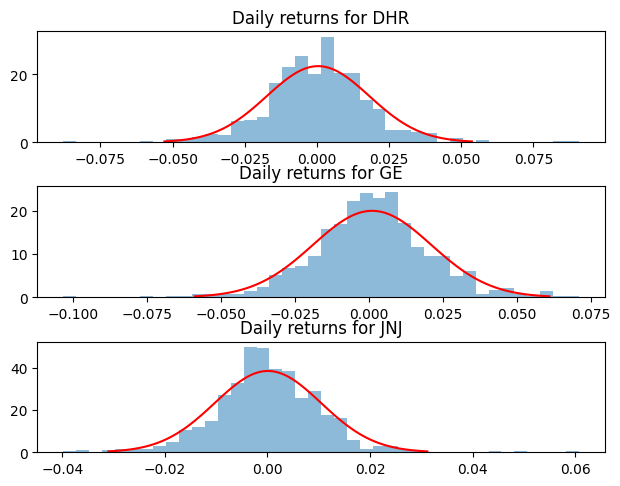

In [12]:
# Histogram of returns (overview of return distribution)
fig, axes = plt.subplots(nrows=3, ncols=1)
fig.tight_layout()

for i, ticker in enumerate(stocks2):
  # New subplot for each stock
  plt.subplot(3, 1, i + 1)

  # Histogram of returns
  plt.title(f"Daily returns for {ticker}")
  plt.hist(stock_returns_2[ticker], bins=40,  density=True, histtype='stepfilled', alpha=0.5)

  # Standard normal for stock returns
  mean = stock_returns_2[ticker].mean()
  std_dev = stock_returns_2[ticker].std()
  x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
  plt.plot(x, scipy.stats.norm.pdf(x, mean, std_dev),"r")

From the previous histograms of stock returns and estimated standard normal distribution for those returns we can clearly see that returns don't follow normal distribution.

One of the drawbacks for calculating VAR using variance-covariance method assumes that stock returns have a multivariate normal distribution. Under this assumption, the distribution of the portfolio return is also normal.

**Calculating VAR:**

We'll calculate 99%, 95% and 90% VAR for those two portfolios based on variance-covariance method. For that we need to estimate portfolio's:
- Expected return (mean)
- Volatility (standard deviation)



In [13]:
# Covariance matrix for assets in portfolio 1
cov_matrix_1 = stock_returns_1.cov()
cov_matrix_1

,AAPL,ADBE,AMD
AAPL,0.000329,0.000275,0.000355
ADBE,0.000275,0.000541,0.000474
AMD,0.000355,0.000474,0.001073


In [14]:
# Covariance matrix for assets in portfolio 2
cov_matrix_2 = stock_returns_2.cov()
cov_matrix_2

,DHR,GE,JNJ
DHR,0.000315,0.000085,0.000047
GE,0.000085,0.000399,0.000032
JNJ,0.000047,0.000032,0.000107


In [15]:
stock_returns_1.mean()

AAPL    0.000721
ADBE    0.000486
AMD     0.000738
dtype: float64

In [16]:
# Expected daily return for portfolio 1
portfolio_mean_1 = stock_returns_1.mean().dot(weights)
print(f"Expected daily return for portfolio 1: {np.round(portfolio_mean_1*100, 4)} %")

Expected daily return for portfolio 1: 0.0648 %


In [17]:
stock_returns_2.mean()

DHR    0.000414
GE     0.001037
JNJ    0.000102
dtype: float64

In [18]:
# Expected daily return for portfolio 2
portfolio_mean_2 = stock_returns_2.mean().dot(weights)
print(f"Expected daily return for portfolio 2: {np.round(portfolio_mean_2*100, 4)} %")

Expected daily return for portfolio 2: 0.0518 %


In [19]:
# Volatility for portfolio 1
weights = np.array(weights)
portfolio_sigma_1 = np.sqrt(weights.T.dot(cov_matrix_1).dot(weights))
print(f"Returns volatility for portfolio 1: {np.round(portfolio_sigma_1*100,4)}%")

Returns volatility for portfolio 1: 2.1477%


In [20]:
# Volatility for portfolio 2
weights = np.array(weights)
portfolio_sigma_2 = np.sqrt(weights.T.dot(cov_matrix_2).dot(weights))
print(f"Returns volatility for portfolio 2: {np.round(portfolio_sigma_2*100,4)}%")

Returns volatility for portfolio 2: 1.1296%


In [21]:
# VAR for portfolio 1
VaR_90 = norm.ppf(1-0.9, portfolio_mean_1, portfolio_sigma_1)
VaR_95 = norm.ppf(1-0.95, portfolio_mean_1, portfolio_sigma_1)
VaR_99 = norm.ppf(1-0.99, portfolio_mean_1, portfolio_sigma_1)
print(tabulate([['90%', VaR_90], ['95%', VaR_95], ["99%", VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0268755
95%                      -0.0346781
99%                      -0.0493146


For calculated VAR for portfolio 1, we can expect that the following day, losses won't be greater than:
- 2.68% with a confidence of 90% (10 % change of loss being greater than 2.68%)
- 3.46% with a confidence of 95% (5 % change of loss being greater than 3.46%)
- 4.93% with a confidence of 99% (1 % change of loss being greater than 4.93%)


In [22]:
# VAR for portfolio 2
VaR_90 = norm.ppf(1-0.9, portfolio_mean_2, portfolio_sigma_2)
VaR_95 = norm.ppf(1-0.95, portfolio_mean_2, portfolio_sigma_2)
VaR_99 = norm.ppf(1-0.99, portfolio_mean_2, portfolio_sigma_2)
print (tabulate([['90%', VaR_90], ['95%', VaR_95], ["99%", VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0139589
95%                      -0.0180628
99%                      -0.025761


For calculated VAR for portfolio 2, we can expect that the following day, losses won't be greater than:
- 1.39% with a confidence of 90% (10 % change of loss being greater than 1.39%)
- 1.80% with a confidence of 95% (5 % change of loss being greater than 1.80%)
- 2.57% with a confidence of 99% (1 % change of loss being greater than 2.57%)


For all the confidence levels, based on calulated VAR, we can see that portfolio 1 (tech stocks) are riskier than portfolio 2 (stocks from different industries).

Now let's test different portfolio allocations and see which one has the best VAR measure (we could further do portfolio optimisation based on VAR level)

In [23]:
def var_varriance_covariance(returns, weights):
  """Calculates VAR using variance-covariance method."""

  # Calculated portfolio mean and signa (assuming normal return distribution)
  cov_matrix = returns.cov()
  mean = returns.mean().dot(weights)
  sigma = np.sqrt(weights.T.dot(cov_matrix).dot(weights))

  VaR_90 = norm.ppf(1-0.9, mean, sigma)
  VaR_95 = norm.ppf(1-0.95, mean, sigma)
  VaR_99 = norm.ppf(1-0.99, mean, sigma)
  print(tabulate([['90%', VaR_90], ['95%', VaR_95], ["99%", VaR_99]], headers=['Confidence Level', 'Value at Risk']))


Portfolio 1:

In [24]:
var_varriance_covariance(stock_returns_2, np.array([0.25, 0.25, 0.5]))

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0125113
95%                      -0.0161754
99%                      -0.0230486


In [25]:
var_varriance_covariance(stock_returns_2, np.array([0.1, 0.5, 0.4]))

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0148303
95%                      -0.0192048
99%                      -0.0274106


In [26]:
var_varriance_covariance(stock_returns_2, np.array([0.05, 0.4, 0.55]))

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0133705
95%                      -0.0173003
99%                      -0.0246718


We can see that for a few portfolio allocations we have that the highest risk measure has the third one: 5% into the first asset, 40% into the second one and 55% into the third one.

Portfolio 2:

In [27]:
var_varriance_covariance(stock_returns_1, np.array([0.25, 0.25, 0.5]))

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0297709
95%                      -0.0384006
99%                      -0.0545886


In [28]:
var_varriance_covariance(stock_returns_1, np.array([0.1, 0.5, 0.4]))

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.029603
95%                      -0.0381681
99%                      -0.0542347


In [29]:
var_varriance_covariance(stock_returns_1, np.array([0.05, 0.4, 0.55]))

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.032064
95%                      -0.0413341
99%                      -0.0587232


In all the additional allocation we test out, it seems that the portfolio 2 is still riskier than the portfolio 1.